<a href="https://colab.research.google.com/github/dqdung1604/AI_Sem2_2022-2023/blob/main/HW1_Position_Salary(W8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
url = 'Position_Salaries.csv'
data = pd.read_csv(url)
data.head(10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


Business Analyst     1
Junior Consultant    1
Senior Consultant    1
Manager              1
Country Manager      1
Region Manager       1
Partner              1
Senior Partner       1
C-level              1
CEO                  1
Name: Position, dtype: int64


<Axes: xlabel='Position', ylabel='count'>

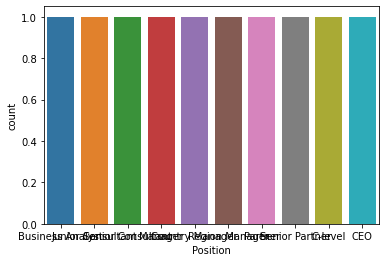

In [22]:
print(data['Position'].value_counts())
sns.countplot(x = 'Position', data = data)

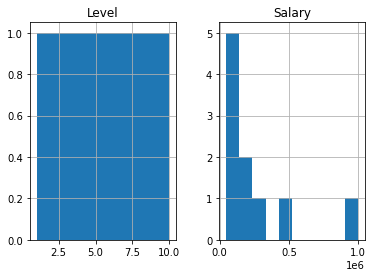

In [ ]:
import matplotlib.pyplot as plt
data.hist()
plt.show()

In [ ]:
correlation = data.corr()
print(correlation)

           Level    Salary
Level   1.000000  0.817949
Salary  0.817949  1.000000


<Axes: >

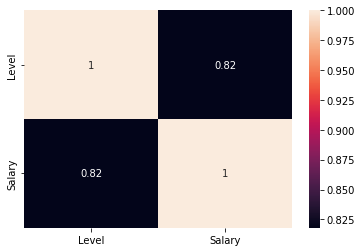

In [ ]:
import seaborn as sns
sns.heatmap(correlation, annot = True)

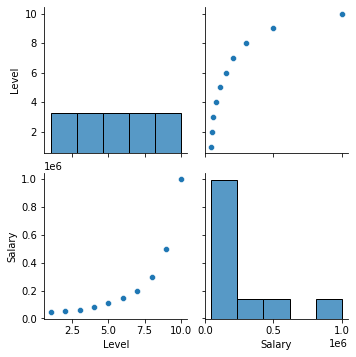

In [ ]:
sns.pairplot(data)

Intercept cua mo hinh: -121333.33333333873
Coefficient cua mo hinh: [180664.33566434 -48548.95104895   4120.04662005]
Do chinh xac cua mo hinh 0.9812097727913366


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


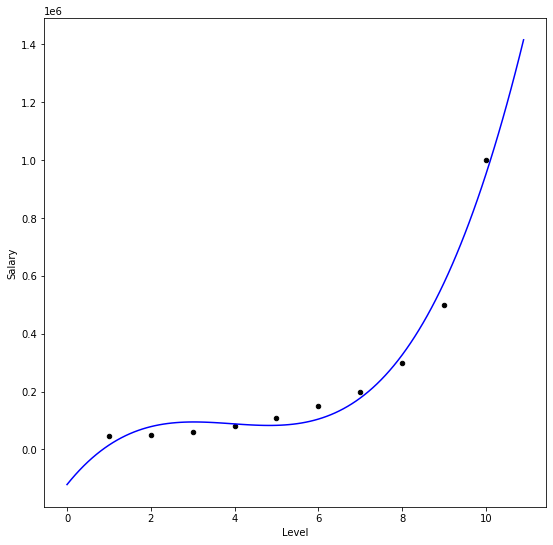

In [ ]:
from sklearn import linear_model
import numpy as np
model = linear_model.LinearRegression()
X = pd.DataFrame([data['Level'], data['Level']**2, data['Level']**3]).T
model.fit(X, y = data['Salary'])
print('Intercept cua mo hinh:', model.intercept_)
print('Coefficient cua mo hinh:', model.coef_)
print('Do chinh xac cua mo hinh', model.score(X, y = data['Salary']))

range = np.arange(0, 11, 0.1)
X_range = pd.DataFrame([range, range**2, range**3]).T
y_pred = model.predict(X = X_range)
data.plot(kind = 'scatter', x = 'Level', y = 'Salary', figsize = (9, 9), color = 'black')
plt.plot(range, y_pred, color = 'blue')